In [27]:
import pandas as pd
df=pd.read_csv('dirty_cafe_sales.csv')
df.head()
df.tail()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [28]:
df.describe()
df.sample(10)
df.head(20)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [29]:
df['Item'].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [44]:
df.isnull().sum()
df.duplicated().sum()
df.isnull()
df.tail(10)
df['Item'].replace(['UNKNOWN','ERROR'],pd.NA)
df['Item'].value_counts()
df['Item'] = df['Item'].ffill()
df['Item'].isnull().sum()
df['Item'].isnull().sum()
df.head()
#df['Price Per Unit'].astype('int')
df['Price Per Unit'] = df['Price Per Unit'].replace(['UNKNOWN','ERROR','nan'],pd.NA)
#df['Price Per Unit'].
df['Price Per Unit'].value_counts()
df['Price Per Unit'] = df['Price Per Unit'].ffill()
df['Price Per Unit'] = df['Price Per Unit'].astype(float).astype(int)

In [45]:
df.head()
df['Total Spent'].value_counts()
df['Total Spent'] = df['Total Spent'].astype(str)
df['Total Spent'] = df['Total Spent'].replace(['UNKNOWN','ERROR','nan'], pd.NA)
df['Total Spent'] = df['Total Spent'].fillna(4.0)
df['Total Spent'] = df['Total Spent'].replace('.','')
df['Total Spent'].value_counts()

df['Total Spent'] = df['Total Spent'].str.replace(r'(\d)\.(\d)', r'\1\2', regex=True)
df['Total Spent'] = df['Total Spent'].fillna(4.0)
#df['Total Spent'] = df['Total Spent'].astype(float)
df['Total Spent'] = df['Total Spent'].astype(int)
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,month,days
0,TXN_1961373,Coffee,2,2,40,Credit Card,Takeaway,2023-09-08,September,Friday
1,TXN_4977031,Cake,4,3,120,Cash,In-store,2023-05-16,May,Tuesday
2,TXN_4271903,Cookie,4,1,4,Credit Card,In-store,2023-07-19,July,Wednesday
3,TXN_7034554,Salad,2,5,100,Credit Card,In-store,2023-04-27,April,Thursday
4,TXN_3160411,Coffee,2,2,40,Digital Wallet,In-store,2023-06-11,June,Sunday


In [46]:
df['Quantity'].value_counts()
df['Quantity'] = df['Quantity'].replace(['UNKNOWN','ERROR'],pd.NA)
df['Quantity'].value_counts()
df['Quantity'] = df['Quantity'].ffill()
df['Quantity'] = df['Quantity'].astype(int)

df['Payment Method'] = df['Payment Method'].replace(['UNKNOWN','ERROR'],pd.NA)
df['Payment Method'] = df['Payment Method'].ffill()
df['Payment Method'].value_counts()

df.head()
df['Location'] = df['Location'].replace(['UNKNOWN','ERROR','nan'],pd.NA)
df['Location'].unique()
df['Location'] = df['Location'].ffill()
df['Location'].isnull().sum()
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,month,days
0,TXN_1961373,Coffee,2,2,40,Credit Card,Takeaway,2023-09-08,September,Friday
1,TXN_4977031,Cake,4,3,120,Cash,In-store,2023-05-16,May,Tuesday
2,TXN_4271903,Cookie,4,1,4,Credit Card,In-store,2023-07-19,July,Wednesday
3,TXN_7034554,Salad,2,5,100,Credit Card,In-store,2023-04-27,April,Thursday
4,TXN_3160411,Coffee,2,2,40,Digital Wallet,In-store,2023-06-11,June,Sunday


<Axes: xlabel='days'>

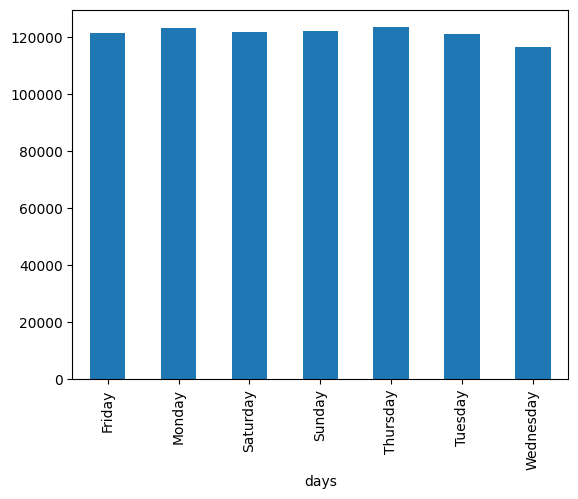

In [47]:
df['Transaction Date'].value_counts()
#df['Transaction Date'].isnull().sum()
df['Transaction Date'] = df['Transaction Date'].replace(['UNKNOWN','ERROR'],pd.NA)
df['Transaction Date'] = df['Transaction Date'].ffill()
df['Transaction Date'].isnull().sum()
df['Transaction Date'] = df['Transaction Date'].astype(str)
df['Transaction Date'].dtype
#df['Transaction date'].dt.month
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Transaction Date'].dtype
df['month'] = df['Transaction Date'].dt.month_name()
df['days'] = df['Transaction Date'].dt.day_name()
df1 = df.groupby('month')['Total Spent'].sum()
df2 = df.groupby('days')['Total Spent'].sum()
df1.plot(x= 'month', y='Total Spent', kind = 'bar')
df2.plot(x= 'days', y= 'Total Spent' , kind='bar')

In [48]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,month,days
0,TXN_1961373,Coffee,2,2,40,Credit Card,Takeaway,2023-09-08,September,Friday
1,TXN_4977031,Cake,4,3,120,Cash,In-store,2023-05-16,May,Tuesday
2,TXN_4271903,Cookie,4,1,4,Credit Card,In-store,2023-07-19,July,Wednesday
3,TXN_7034554,Salad,2,5,100,Credit Card,In-store,2023-04-27,April,Thursday
4,TXN_3160411,Coffee,2,2,40,Digital Wallet,In-store,2023-06-11,June,Sunday


 to insert a column 
 df.insert(2,'total',df['price']*['quantity'])

In [49]:
import plotly.express as px

In [50]:
df.head() 
df['Transaction Date']

0      2023-09-08
1      2023-05-16
2      2023-07-19
3      2023-04-27
4      2023-06-11
          ...    
9995   2023-08-30
9996   2023-06-02
9997   2023-03-02
9998   2023-12-02
9999   2023-11-07
Name: Transaction Date, Length: 10000, dtype: datetime64[ns]

In [51]:
df['Transaction Date'] = df['Transaction Date'].astype(str)
df['Transaction Date'].dtype
df['Transaction Date'].apply(lambda x: x.split('-')[0].strip('3'))

0       202
1       202
2       202
3       202
4       202
       ... 
9995    202
9996    202
9997    202
9998    202
9999    202
Name: Transaction Date, Length: 10000, dtype: object

In [52]:
df.head()
s= df.groupby(by='Item')
for i in s:
    print(i)

('Cake',      Transaction ID  Item  Quantity  Price Per Unit  Total Spent  \
1       TXN_4977031  Cake         4               3          120   
18      TXN_8876618  Cake         5               3          150   
29      TXN_7640952  Cake         4               3          120   
30      TXN_1736287  Cake         5               2          100   
49      TXN_8230936  Cake         3               3           90   
...             ...   ...       ...             ...          ...   
9964    TXN_8938445  Cake         3               3           90   
9972    TXN_3124078  Cake         4               3          120   
9975    TXN_9668108  Cake         1               3           30   
9985    TXN_3297457  Cake         2               3           60   
9988    TXN_9594133  Cake         5               3            4   

      Payment Method  Location Transaction Date     month      days  
1               Cash  In-store       2023-05-16       May   Tuesday  
18              Cash  In-store    

In [60]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,month,days
0,TXN_1961373,Coffee,2,2,40,Credit Card,Takeaway,2023-09-08,September,Friday
1,TXN_4977031,Cake,4,3,120,Cash,In-store,2023-05-16,May,Tuesday
2,TXN_4271903,Cookie,4,1,4,Credit Card,In-store,2023-07-19,July,Wednesday
3,TXN_7034554,Salad,2,5,100,Credit Card,In-store,2023-04-27,April,Thursday
4,TXN_3160411,Coffee,2,2,40,Digital Wallet,In-store,2023-06-11,June,Sunday


ValueError: iAt based indexing can only have integer indexers